Số lượng giá trị thiếu trong mỗi cột:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


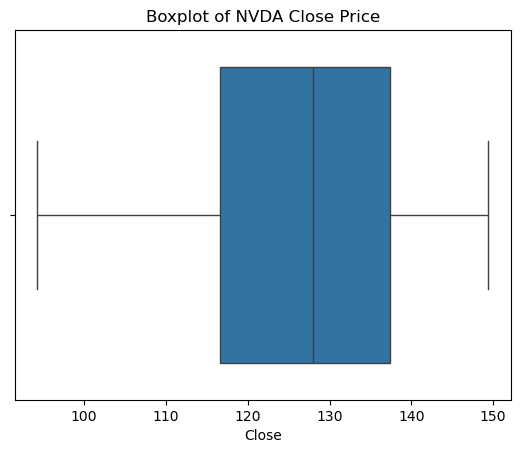

In [6]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Đọc dữ liệu đã tải xuống từ bước 2 (nếu bạn đã lưu vào CSV)
df = pd.read_csv("nvda_stock_data.csv")

# 1. Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())  # Kiểm tra số lượng giá trị thiếu trong từng cột

# Nếu có giá trị thiếu, điền giá trị thiếu (hoặc loại bỏ các dòng có giá trị thiếu)
df.ffill(inplace=True)  # Dùng phương pháp điền giá trị thiếu bằng giá trị gần nhất

sns.boxplot(x=df['Close'])
plt.title("Boxplot of NVDA Close Price")
plt.show()
# Loại bỏ outliers (nếu có)
upper_limit = df['Close'].quantile(0.95)  # Giới hạn trên
lower_limit = df['Close'].quantile(0.05)  # Giới hạn dưới

df = df[(df['Close'] <= upper_limit) & (df['Close'] >= lower_limit)]  # Lọc bỏ outliers


In [7]:
# 3. Chuyển cột Date về định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], utc=True)  # Chuyển đổi về datetime với utc=True

# In lại dữ liệu sau khi làm sạch
print("Dữ liệu sau khi làm sạch:")
print(df.head())

# Lưu lại dữ liệu đã làm sạch vào CSV
df.to_csv("nvda_stock_data_cleaned.csv", index=False)

Dữ liệu sau khi làm sạch:
                       Date        Open        High         Low       Close  \
0 2024-06-20 04:00:00+00:00  139.755865  140.715553  129.479112  130.738708   
1 2024-06-21 04:00:00+00:00  127.079851  130.588744  124.260742  126.530022   
2 2024-06-24 04:00:00+00:00  123.201078  124.420694  118.002723  118.072701   
3 2024-06-25 04:00:00+00:00  121.161716  126.460045  119.282313  126.050171   
4 2024-06-26 04:00:00+00:00  126.090173  128.079543  122.561289  126.360092   

      Volume  Dividends  Stock Splits  
0  517768400        0.0           0.0  
1  655484700        0.0           0.0  
2  476060900        0.0           0.0  
3  425787500        0.0           0.0  
4  362975900        0.0           0.0  


In [8]:
import plotly.graph_objects as go

# Chuyển cột 'Date' thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thiết lập cột 'Date' làm index
df.set_index('Date', inplace=True)

# Tạo biểu đồ nến
fig_candlestick = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])

fig_candlestick.update_layout(
    title='Candlestick Chart for NVDA (1 Year)',
    title_font=dict(
        color='white',
        size=24, 
        family="Arial, sans-serif", 
        weight='bold'  
    ),
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    plot_bgcolor='black', 
    paper_bgcolor='black',
    font=dict(color="white"),
    xaxis=dict(
        gridcolor='white', 
        color='white',   
        ticks="outside",   
        ticklen=6, 
        tickwidth=1,
    ),
    yaxis=dict(
        gridcolor='white',
        color='white',
        ticks="outside", 
        ticklen=6, 
        tickwidth=2, 
    ),
    shapes=[
        dict(
            type='line',
            x0=df.index[0],
            x1=df.index[-1],
            y0=df['Low'].min(),
            y1=df['Low'].min(),
            line=dict(color='white', width=1)
        ),
        dict(
            type='line',
            x0=df.index[0],
            x1=df.index[-1],
            y0=df['High'].max(),
            y1=df['High'].max(),
            line=dict(color='white', width=1)
        ),
    ]
)

# Hiển thị biểu đồ nến
fig_candlestick.show()


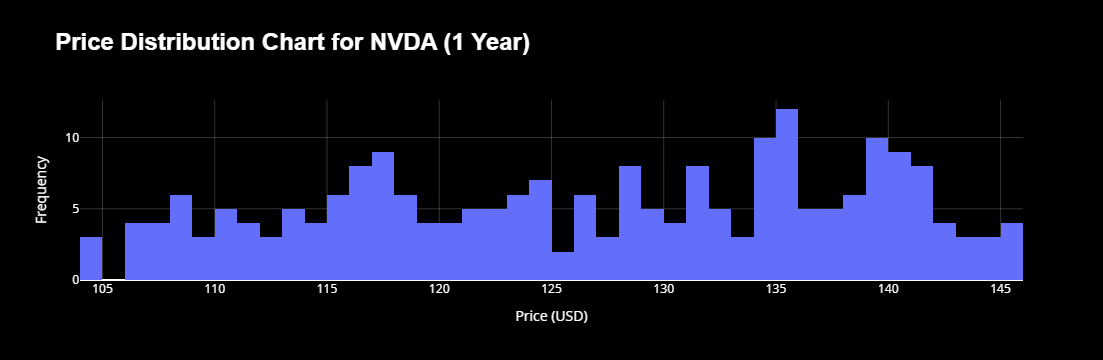

In [9]:
# Vẽ biểu đồ phân phối giá (Price Distribution Chart)
fig = px.histogram(df, x='Close', nbins=50, title="Price Distribution Chart for NVDA (1 Year)", labels={"Close": "Price (USD)"})

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white', 
    title_font=dict(
        color='white', 
        size=24, 
        family="Arial, sans-serif",  
        weight='bold'  
    ),
    xaxis_title="Price (USD)",
    yaxis_title="Frequency",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)') 
)

# Hiển thị biểu đồ
fig.show()


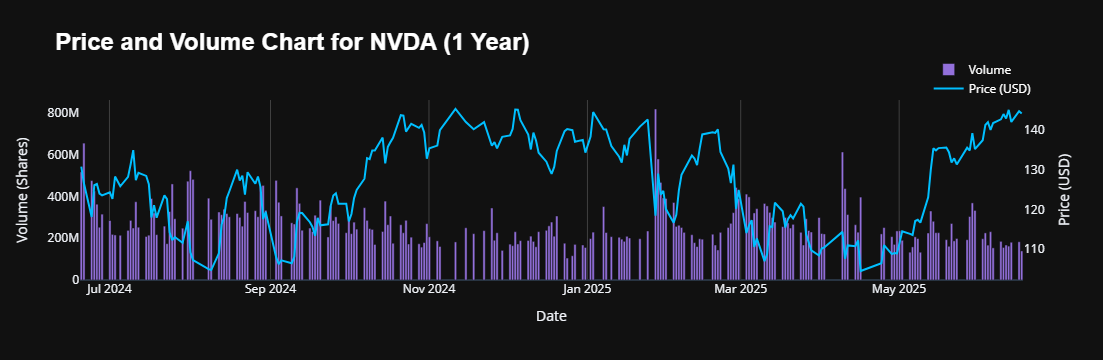

In [10]:
import plotly.graph_objects as go

# Tạo biểu đồ Price and Volume
fig = go.Figure()

# Cột khối lượng giao dịch (yaxis) trái
fig.add_trace(go.Bar(
    x=df.index, 
    y=df['Volume'], 
    name='Volume',
    marker=dict(color='mediumpurple'),
    yaxis='y' 
))

# Đường giá cổ phiếu (yaxis2) phải
fig.add_trace(go.Scatter(
    x=df.index, 
    y=df['Close'], 
    mode='lines', 
    name='Price (USD)',
    line=dict(color='deepskyblue'), 
    yaxis='y2'
))

# Cập nhật layout
fig.update_layout(
    title="Price and Volume Chart for NVDA (1 Year)",
    xaxis_title="Date",  # Đảm bảo trục x là 'Date'
    title_font=dict(
        color='white',
        size=24, 
        family="Arial, sans-serif",
        weight='bold'
    ),
    yaxis=dict(  # Trục Volume
        title="Volume (Shares)",
        showgrid=False,
        side="left"
    ),
    yaxis2=dict(  # Trục Price
        title="Price (USD)",
        overlaying="y",
        side="right",
        showgrid=False
    ),
    legend=dict(  # Chỉ khai báo legend 1 lần
        x=0.9, 
        y=1.25,
        xanchor='left',
        yanchor='top',  
        bgcolor='rgba(0, 0, 0, 0)',  
        font=dict(color='white')  
    ),
    bargap=0.1,
    template="plotly_dark",
    xaxis=dict(
        title="Date",  # Đảm bảo tiêu đề trục x là 'Date'
        showgrid=True,
        gridcolor='rgba(255,255,255,0.2)'  
    )
)

fig.show()
